# Data Analysis of UPV Dataset

## 1. Introduce environmental variables

In [68]:
# prepare environmental variables for the project
WORKING_DIRECTORY <- "C:\\Users\\User\\Desktop\\Studia\\ERASMUS\\DATA_ANALYSIS\\analysisProject\\"

DATASET_PATH <- "resources\\"
COURSES <- "students_courses.csv"
ENROLMENTS <- "students_enrolment.csv"
YEARS <- "students_years.csv"

OUTPUT <- "output\\"


#libraries
library(dplyr)

Sys.setenv(LANG = "en")

## 2. Load the datasets

The provided data has been presented in the form of csv file. What is worth noticing - there has been used a ";" separator insted of "," one.


In [18]:
# Load the data 
courses_df <-  read.csv(paste(WORKING_DIRECTORY, DATASET_PATH, COURSES, sep='') ,header=TRUE, sep=';')
enrolments_df <- read.csv(paste(WORKING_DIRECTORY, DATASET_PATH, ENROLMENTS, sep='') ,header=TRUE, sep=';')
years_df <- read.csv(paste(WORKING_DIRECTORY, DATASET_PATH, YEARS, sep='') ,header=TRUE, sep=';')

In [19]:
# preview the data
head(enrolments_df, 3)
head(courses_df, 3)
head(years_df, 3)

NIP,TIT,ANYCOM,ING_INGRESO,ING_NOTA,ING_CONV,ING_EST,ING_CUPO,CURSO_TITULADO,EDAD,SEXO,ESTUDIS_P,ESTUDIS_M,CRE_RECON_INI,NUMPRE
439444,156,2010,NAI,"6,1",J,10,G,NA,19,V,5,5,6,8
466072,156,2010,NAP,"6,02",S,10,G,NA,25,V,4,4,0,1
354734,156,2010,NAP,"6,9",J,10,G,NA,22,V,5,5,0,1


NIP,TIT,ASI,CACA,GLM,CTOT,BLO,TPBLO,COND_ASI,ACTA,NOTA,CAL,TIPCRE
12428,156,11553,2014,RE1,6,3,B,,S,"7,1",N,B
12428,156,11567,2014,RE1,"4,5",3,G,,S,"8,1",N,O
12428,156,11572,2014,RE1,"4,5",4,G,,S,8,N,O


NIP,TIT,CACA,TRABAJO_A,OBTIENE_BECA,ESTADO,CRE_MAT,CRE_SUP,CRE_SUS,CRE_NP,CRE_MAT_CN,CRE_SUP_CN,CRE_SUS_CN,CRE_NP_CN
504943,158,2012,NA,-,,"25,5","25,5",0,0,"25,5","25,5",0,0
504911,158,2012,NA,-,,"25,5","19,5",6,0,"25,5","19,5",6,0
504898,158,2012,NA,-,,"28,5","19,5",0,9,"28,5","19,5",0,9


## 3. Translate the headers
As the data has been privided in spanish, some translations are required in order for the avarege user to understand it. Such translations has been applied:
NT == "No Transtlation"  
    

### 3.1 Students_enrolment.csv
For each student enrolling in one of the selected four degrees, the file includes demographic 
information, admission grade, previous studies, parents’ educational level, etc. It is important 
to point out that it refers only to the first registration in a given degree.

NIP --> Stud_ID - a unique identification number for the student

TIT --> Degree_ID - identification code for the degree on which the student was registered

- 156: Bachelor's Degree in Informatics Engineering (School of Informatics, Valencia)

- 158: Bachelor's Degree in Business Administration and Management (Faculty of Business Administration and Management, Valencia)

- 182: Bachelor's Double Degree in Business Administration and Management + Informatics Engineering (Valencia)

- 189: Bachelor's Degree in Data Science (School of Informatics, Valencia)

ANYCOM --> Start_Year - the student’s starting year in the degree

ING_INGRESO --> Enrolment_Type

ING_NOTA --> Admission_Grade - university admission grade for this degree (ranges depend on the entry 
type)

ING_CONV --> 'NO DATA'

ING_EST --> Prev_Studies - previous studies

ING_CUPO --> Entry_Type - Entry Type (?)

COURSO_TITULADO --> Course Title

EDAD --> Start_Age - age at the beginning of the academic year (1st September ANYCOM [Start Year])

SEXO -->  Sex - gender

ESTUDIS_P --> Father_Edu_Lev -  father's educational leve

ESTUDIS_M --> Mother_Edu_Lev - mother's educational level

CRE_RECON_INI	--> NO DATA

NUMPRE --> NT (?) - position of the degree in the ordered options of the pre-registration


In [23]:
colnames(enrolments_df) <- c(
    "Stud_ID",
    "Degree_ID",
    "Start_Year",
    "Enrolment_Type",
    "Admission_Grade",
    "ING_CONV",
    "Prev_Studies",
    "Entry_Type",
    "Course_Title",
    "Start_Age",
    "Sex",
    "Father_Edu_Lev",
    "Mother_Edu_Lev",
    "CRE_RECON_INI",
    "Numpre")
head(enrolments_df)

Stud_ID,Degree_ID,Start_Year,Enrolment_Type,Admission_Grade,ING_CONV,Prev_Studies,Entry_Type,Course_Title,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,CRE_RECON_INI,Numpre
439444,156,2010,NAI,"6,1",J,10,G,NA,19,V,5,5,6,8
466072,156,2010,NAP,"6,02",S,10,G,NA,25,V,4,4,0,1
354734,156,2010,NAP,"6,9",J,10,G,NA,22,V,5,5,0,1
460803,156,2010,NAP,"6,833",J,11,G,2014,18,V,5,4,60,1
460956,156,2010,NSA,"9,016",J,10,G,NA,17,V,4,4,,2
460850,156,2010,NAP,"9,129",J,5,G,NA,22,V,5,4,12,1


### 3.1 Students_courses.csv
For each student enrolling in one of the selected four degrees, and for each academic year, the 
file includes information about each course in which the student is enrolled, its characteristics 
as well as the final grade

NIP --> Stud_ID: a unique identification number for the student

TIT --> Degree_ID identification code for the degree on which the student is registered

ASI --> Course_ID: identification code of the course

CACA --> Academic_Year: academic year

GLM --> Course_Section: section where the student is registered for that course

CTOT --> ECTS: ECTS credits

BLO --> Course_Mod: module to which the course belongs

TPBLO --> Mod_Type: module type to which the course belongs

COND_ASI --> NO DATA

ACTA --> NO DATA

NOTA --> Final_Grade: final grade as shown on the student transcript

CAL --> NO DATA

TIPCRE --> Course_Type: course type


In [24]:
head(courses_df)
colnames(courses_df) <- c(
    "Stud_ID",
    "Degree_ID",
    "Course_ID",
    "Academic_Year",
    "Course_Section",
    "ECTS",
    "Course_Mod",
    "Mod_Type",
    "COND_ASI",
    "ACTA",
    "Final_Grade",
    "CAL",
    "Course_Type")
head(courses_df)

Stud_ID,Degree_ID,Course_ID,Academic_Year,Course_Section,ECTS,Course_Mod,Mod_Type,Final_Grade,Course_Type,NA,NA,NA
12428,156,11553,2014,RE1,6,3,B,,S,"7,1",N,B
12428,156,11567,2014,RE1,"4,5",3,G,,S,"8,1",N,O
12428,156,11572,2014,RE1,"4,5",4,G,,S,8,N,O
12428,156,11568,2014,RE1,"4,5",3,G,,S,"7,8",N,O
12428,156,11660,2015,TFG,12,4,B,,-,"7,5",N,G
12428,156,11560,2015,RE1,"4,5",3,B,,S,"7,1",N,B


Stud_ID,Degree_ID,Course_ID,Academic_Year,Course_Section,ECTS,Course_Mod,Mod_Type,COND_ASI,ACTA,Final_Grade,CAL,Course_Type
12428,156,11553,2014,RE1,6,3,B,,S,"7,1",N,B
12428,156,11567,2014,RE1,"4,5",3,G,,S,"8,1",N,O
12428,156,11572,2014,RE1,"4,5",4,G,,S,8,N,O
12428,156,11568,2014,RE1,"4,5",3,G,,S,"7,8",N,O
12428,156,11660,2015,TFG,12,4,B,,-,"7,5",N,G
12428,156,11560,2015,RE1,"4,5",3,B,,S,"7,1",N,B


## Students_years.csv
For each student enrolling in one of the selected four degrees, and for each academic year, the 
file includes information about the total number of registered credits, as well as passed, failed 
and no-show credits. It also contains some additional socio-economical information.
Columns are:

NIP --> Stud_ID: a unique identification number for the student

TIT --> Degree_ID: identification code for the degree on which the student is registered

CACA --> Academic_Year: academic year

TRABAJO_A --> Stud_Job: has the student a job (part time, full-time)?

OBTIENE_BECA --> Stud_Scholarship has the student obtained a scholarship?

ESTADO --> Is_Reg_Open: is the registration active?

CRE_MAT --> Credits_Total: total number of registered credits on that academic year

CRE_SUP --> Credits_Passed_Total: total number of passed credits on that academic year

CRE_SUS --> Credits_Failed_Total: total number of failed credits on that academic year

CRE_NP --> Credits_No_Show_Total: total number of no-show credits on that academic year

CRE_MAT_CN --> Credits_Normal_Reg_Total total number of registered credits in “normal conditions”, excluding recognitions, adaptations…on that academic 

CRE_SUP_CN --> Credits_Passed_Normal: total number of passed credits in “normal conditions”

CRE_SUS_CN --> Credits_Failed_Normal: total number of failed credits in “normal conditions”

CRE_NP_CN --> Credits_No_Show_Normal total number of no-show credits in “normal conditions

In [25]:
head(years_df)
colnames(years_df) <- c(
    "Stud_ID",
    "Degree_ID",
    "Academic_Year",
    "Stud_Job",
    "Stud_Scholarship",
    "Is_Reg_Open",
    "Credits_Total",
    "Credits_Passed_Total",
    "Credits_Failed_Total",
    "Credits_No_Show_Total",
    "Credits_Normal_Reg_Total",
    "Credits_Passed_Normal",
    "Credits_Failed_Normal",
    "Credits_No_Show_Normal")
head(years_df)

Stud_ID,Degree_ID,Academic_Year,Stud_Job,Stud_Scholarship,Is_Reg_Open,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
504943,158,2012,NA,-,,"25,5","25,5",0,0,"25,5","25,5",0,0
504911,158,2012,NA,-,,"25,5","19,5",6,0,"25,5","19,5",6,0
504898,158,2012,NA,-,,"28,5","19,5",0,9,"28,5","19,5",0,9
504997,158,2012,NA,-,,15,0,9,6,15,0,9,6
505000,158,2012,NA,-,,15,15,0,0,15,15,0,0
504999,158,2012,NA,-,,27,"22,5",0,"4,5",27,"22,5",0,"4,5"


Stud_ID,Degree_ID,Academic_Year,Stud_Job,Stud_Scholarship,Is_Reg_Open,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
504943,158,2012,NA,-,,"25,5","25,5",0,0,"25,5","25,5",0,0
504911,158,2012,NA,-,,"25,5","19,5",6,0,"25,5","19,5",6,0
504898,158,2012,NA,-,,"28,5","19,5",0,9,"28,5","19,5",0,9
504997,158,2012,NA,-,,15,0,9,6,15,0,9,6
505000,158,2012,NA,-,,15,15,0,0,15,15,0,0
504999,158,2012,NA,-,,27,"22,5",0,"4,5",27,"22,5",0,"4,5"


# Data cleaning
To make our life easier, lets drop all NA values

### Enrolments
Verify the summary if there are some values missing

In [162]:
summary(enrolments_df)

    Stud_ID         Degree_ID       Start_Year   Enrolment_Type Admission_Grade
 Min.   :  1529   Min.   :156.0   Min.   :2010   NAP    :6628          :2673   
 1st Qu.:497177   1st Qu.:156.0   1st Qu.:2013   NUE    :1366   7      :  43   
 Median :552597   Median :156.0   Median :2015          :1101   6      :  33   
 Mean   :541299   Mean   :158.3   Mean   :2015   BMA    : 623   7,2    :  24   
 3rd Qu.:616978   3rd Qu.:158.0   3rd Qu.:2018   NAI    : 586   6,5    :  23   
 Max.   :705508   Max.   :189.0   Max.   :2020   NCA    : 317   7,5    :  23   
 NA's   :5                                       (Other): 828   (Other):8630   
 ING_CONV  Prev_Studies      Entry_Type    Course_Title    Start_Age    
  :2680   Min.   : 2.000   G      :8382   Min.   :2013   Min.   :16.00  
 J:8651   1st Qu.:10.000          :2674   1st Qu.:2015   1st Qu.:18.00  
 S: 118   Median :10.000   T      : 156   Median :2017   Median :18.00  
          Mean   : 9.245   M      : 119   Mean   :2017   Mean   :20.

In [164]:
# Data cleaning
enrolments_df_clean <- na.omit(enrolments_df) 
summary(enrolments_df_clean)

    Stud_ID         Degree_ID       Start_Year   Enrolment_Type Admission_Grade
 Min.   : 43654   Min.   :156.0   Min.   :2010   NAP    :1958   6      :   8   
 1st Qu.:479185   1st Qu.:156.0   1st Qu.:2011   NLE    :  52   7,5    :   8   
 Median :515393   Median :156.0   Median :2013   NSC    :  15   8      :   8   
 Mean   :513712   Mean   :156.8   Mean   :2013   NRO    :  10   6,7    :   7   
 3rd Qu.:552335   3rd Qu.:158.0   3rd Qu.:2015   NSA    :   4   7      :   6   
 Max.   :619168   Max.   :182.0   Max.   :2018   NTE    :   4   10     :   5   
                                                 (Other):   4   (Other):2005   
 ING_CONV  Prev_Studies      Entry_Type    Course_Title    Start_Age    
  :   0   Min.   : 4.000   G      :2017   Min.   :2013   Min.   :17.00  
 J:2035   1st Qu.:10.000   M      :  14   1st Qu.:2015   1st Qu.:18.00  
 S:  12   Median :10.000   T      :  10   Median :2017   Median :18.00  
          Mean   : 9.275   D      :   3   Mean   :2017   Mean   :18.

As we can see now, there are no NAs in our table.

## Courses and Years
Now we will do the same for those two tables

In [166]:
print("COURSES")
print("_____________________________________")
summary(courses_df)

print("YEARS")
print("_____________________________________")
summary(years_df)

[1] "COURSES"
[1] "_____________________________________"


    Stud_ID         Degree_ID     Course_ID     Academic_Year  Course_Section  
 Min.   :  1529   Min.   :156   Min.   :  -14   Min.   :2010          : 12467  
 1st Qu.:493513   1st Qu.:156   1st Qu.:11548   1st Qu.:2014   2A1    :  5734  
 Median :532411   Median :156   Median :11565   Median :2016   2A2    :  5440  
 Mean   :532522   Mean   :158   Mean   :11638   Mean   :2016   1A1    :  5231  
 3rd Qu.:594304   3rd Qu.:158   3rd Qu.:11744   3rd Qu.:2018   1A2    :  4940  
 Max.   :689127   Max.   :189   Max.   :34254   Max.   :2020   3A1    :  3731  
 NA's   :55                                                    (Other):169933  
      ECTS          Course_Mod    Mod_Type   COND_ASI   ACTA      
 6      :130659   Min.   :0.00     : 46101    :207414   -: 14571  
 4,5    : 61319   1st Qu.:1.00    7:   454   +:    13   L:  1875  
 9      : 10155   Median :2.00    A:     2   B:    45   S:191030  
 12     :  2701   Mean   :2.09    B:128120   G:     2             
 1      :   980   3rd Qu.

[1] "YEARS"
[1] "_____________________________________"


    Stud_ID         Degree_ID     Academic_Year     Stud_Job    
 Min.   :  1529   Min.   :156.0   Min.   :2010   Min.   :0.000  
 1st Qu.:479242   1st Qu.:156.0   1st Qu.:2014   1st Qu.:0.000  
 Median :528995   Median :156.0   Median :2016   Median :0.000  
 Mean   :526745   Mean   :157.9   Mean   :2016   Mean   :1.242  
 3rd Qu.:589397   3rd Qu.:158.0   3rd Qu.:2018   3rd Qu.:3.000  
 Max.   :689127   Max.   :189.0   Max.   :2020   Max.   :4.000  
 NA's   :6                                       NA's   :1324   
 Stud_Scholarship  Is_Reg_Open    Credits_Total   Credits_Passed_Total
 -:12166                 :24172   60     : 7702   60     : 4375       
 N: 3762          B      :  122   30     : 1621   30     : 1524       
 P:  217          A      :   11   54     : 1160   54     : 1306       
 S: 8177          E      :   10   42     :  744   0      : 1109       
                  T      :    2   48     :  722   12     :  992       
                  Y      :    2   12     :  597   42  

In [167]:
print("Clean courses")
print("_____________________________________")
courses_df_clean <- na.omit(courses_df) 
summary(courses_df_clean)

print("Clean years")
print("_____________________________________")
years_df_clean <- na.omit(years_df) 
summary(years_df_clean)

[1] "Clean courses"
[1] "_____________________________________"


    Stud_ID         Degree_ID       Course_ID     Academic_Year 
 Min.   :  1529   Min.   :156.0   Min.   :  -14   Min.   :2010  
 1st Qu.:479016   1st Qu.:156.0   1st Qu.:11547   1st Qu.:2013  
 Median :515587   Median :156.0   Median :11563   Median :2015  
 Mean   :511748   Mean   :157.4   Mean   :11568   Mean   :2015  
 3rd Qu.:552800   3rd Qu.:158.0   3rd Qu.:11741   3rd Qu.:2017  
 Max.   :688361   Max.   :189.0   Max.   :14104   Max.   :2020  
                                                                
 Course_Section        ECTS          Course_Mod    Mod_Type   COND_ASI  
        :  5987   6      :100722   Min.   :0.000    :     0    :161275  
 2A1    :  4768   4,5    : 47367   1st Qu.:1.000   7:   454   +:    10  
 2A2    :  4437   9      :  8436   Median :2.000   A:     2   B:    32  
 1A1    :  4350   12     :  2392   Mean   :2.086   B:128101   G:     2  
 1A2    :  4131   1      :   980   3rd Qu.:3.000   G: 30888   M:     1  
 3TI    :  2972   7,5    :   549   Max.   

[1] "Clean years"
[1] "_____________________________________"


    Stud_ID         Degree_ID     Academic_Year     Stud_Job    
 Min.   :  1529   Min.   :156.0   Min.   :2010   Min.   :0.000  
 1st Qu.:479127   1st Qu.:156.0   1st Qu.:2014   1st Qu.:0.000  
 Median :528914   Median :156.0   Median :2016   Median :0.000  
 Mean   :524000   Mean   :157.9   Mean   :2016   Mean   :1.242  
 3rd Qu.:577940   3rd Qu.:158.0   3rd Qu.:2018   3rd Qu.:3.000  
 Max.   :689127   Max.   :189.0   Max.   :2020   Max.   :4.000  
                                                                
 Stud_Scholarship  Is_Reg_Open    Credits_Total   Credits_Passed_Total
 -:10846                 :22848   60     : 7676   60     : 4363       
 N: 3761          B      :  122   30     : 1478   30     : 1446       
 P:  217          A      :   11   54     : 1151   54     : 1296       
 S: 8174          E      :   10   42     :  738   0      : 1031       
                  T      :    2   48     :  715   42     :  972       
                  Y      :    2   12     :  592   12  

______________________________________________________
# DATA JOINING

In [172]:
head(enrolments_df_clean, 0)
head(years_df_clean, 0)
head(courses_df_clean, 0)

Stud_ID,Degree_ID,Start_Year,Enrolment_Type,Admission_Grade,ING_CONV,Prev_Studies,Entry_Type,Course_Title,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,CRE_RECON_INI,Numpre


Stud_ID,Degree_ID,Academic_Year,Stud_Job,Stud_Scholarship,Is_Reg_Open,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal


Stud_ID,Degree_ID,Course_ID,Academic_Year,Course_Section,ECTS,Course_Mod,Mod_Type,COND_ASI,ACTA,Final_Grade,CAL,Course_Type


### Enrolments + Courses + Years
    I would like to be able to merge the general data from enrolmens to courses. I want to be able to identify which student participated in which courses, when he/she started ect. 
    
    I will merge on Stud_ID
    
    I will use "Inner join" method, as I want to have the data for students, who appeares in both datasets

In [175]:
# See the data
head(enrolments_df_clean)
head(courses_df_clean)

,Stud_ID,Degree_ID,Start_Year,Enrolment_Type,Admission_Grade,ING_CONV,Prev_Studies,Entry_Type,Course_Title,Start_Age,Sex,Father_Edu_Lev,Mother_Edu_Lev,CRE_RECON_INI,Numpre
4,460803,156,2010,NAP,"6,833",J,11,G,2014,18,V,5,4,60,1
7,460841,156,2010,NAP,"6,1",J,10,G,2017,19,M,4,3,30,1
9,460463,158,2010,NAP,"9,618",J,10,G,2014,18,V,3,3,60,2
11,461003,156,2010,NAP,"10,02",J,10,G,2013,18,M,3,5,60,1
14,331928,156,2010,NAP,"10,25",J,5,G,2014,24,V,5,5,60,1
15,460393,158,2010,NAP,"10,056",J,10,G,2015,18,M,5,5,60,3


Stud_ID,Degree_ID,Course_ID,Academic_Year,Course_Section,ECTS,Course_Mod,Mod_Type,COND_ASI,ACTA,Final_Grade,CAL,Course_Type
12428,156,11553,2014,RE1,6,3,B,,S,"7,1",N,B
12428,156,11567,2014,RE1,"4,5",3,G,,S,"8,1",N,O
12428,156,11572,2014,RE1,"4,5",4,G,,S,8,N,O
12428,156,11568,2014,RE1,"4,5",3,G,,S,"7,8",N,O
12428,156,11660,2015,TFG,12,4,B,,-,"7,5",N,G
12428,156,11560,2015,RE1,"4,5",3,B,,S,"7,1",N,B


In [178]:
# merge two data frames by Stud_ID
enrolments_courses_df <- merge(enrolments_df_clean, courses_df_clean,by="Stud_ID")
head(enrolments_courses_df)

Stud_ID,Degree_ID.x,Start_Year,Enrolment_Type,Admission_Grade,ING_CONV,Prev_Studies,Entry_Type,Course_Title,Start_Age,...,Academic_Year,Course_Section,ECTS,Course_Mod,Mod_Type,COND_ASI,ACTA,Final_Grade,CAL,Course_Type
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,2011,2B1,6,2,B,,S,"8,4",N,B
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,2013,3D1,6,3,B,,S,,Z,B
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,2012,2B1,"4,5",2,B,,S,"5,6",A,B
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,2012,331,"4,5",3,G,,S,"9,3",E,O
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,2012,OA2,"4,5",2,G,,S,"7,3",N,O
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,2014,4IS,"4,5",4,G,,S,"9,3",E,O


In [186]:
print("We have data about this manny students")
nrow(enrolments_df_clean)

print("We have data about this many differnet courses")
nrow(courses_df_clean)

print("If we take our left students and courses we will have this many information")
nrow(enrolments_courses_df)

print("As it can be seen, we (lets say dropped) 80k rows of temporary unnecesary data. 
I dont say it is perfect, I think it could be imporved by reversing what we dropped with NA")

[1] "We have data about this manny students"


[1] 2047

[1] "We have data about this many differnet courses"


[1] 161320

[1] "If we take our left students and courses we will have this many information"


[1] 80757

[1] "As it can be seen, we (lets say dropped) 80k rows of temporary unnecesary data. \nI dont say it is perfect, I think it could be imporved by reversing what we dropped with NA"


### And add years

In [187]:
full_df <- merge(enrolments_courses_df, years_df_clean, by="Stud_ID")
head(full_df)

Stud_ID,Degree_ID.x,Start_Year,Enrolment_Type,Admission_Grade,ING_CONV,Prev_Studies,Entry_Type,Course_Title,Start_Age,...,Stud_Scholarship,Is_Reg_Open,Credits_Total,Credits_Passed_Total,Credits_Failed_Total,Credits_No_Show_Total,Credits_Normal_Reg_Total,Credits_Passed_Normal,Credits_Failed_Normal,Credits_No_Show_Normal
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,-,,45,"25,5","4,5",15,45,"25,5","4,5",15
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,N,,60,54,0,6,60,54,0,6
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,S,,57,57,0,0,57,57,0,0
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,-,,60,54,0,6,60,54,0,6
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,-,,24,24,0,0,24,24,0,0
43654,156,2010,NAP,"7,3",J,4,T,2015,35,...,-,,12,12,0,0,12,12,0,0


    So it happened, we merged all the tables into one, big table with all the informations that we have. Now we can make some nice analysis (i think).

# THATS ALL WHAT IS OFFICAL, EVERYTHING BELOW IS MY TRIALAS

______________________________________________________
# Clustering of the students

In [168]:
# loading the cluster package
library(cluster)
head(enrolments_df_clean)

# Select one degree - try to claster this for students according to different features of different courses.
cluster_data <- 


ERROR: Error in parse(text = x, srcfile = src): <text>:8:0: unexpected end of input
6: cluster_data <- 
7: 
  ^


In [62]:
# porównam poziom wykształcenia rodziców vs wiek rozpoczęcia studiów
# porównam poziom wykształcenia rodziców vs admission_grade



Warning message in storage.mode(x) <- "double":
"pojawiły się wartości NA na skutek przekształcenia"

ERROR: Error in do_one(nmeth): wartość NA/NaN/Inf w wywołaniu obcej funcji (argument 1)


In [63]:
summary(enrolments_df_clean)

    Stud_ID         Degree_ID       Start_Year   Enrolment_Type Admission_Grade
 Min.   : 43654   Min.   :156.0   Min.   :2010   NAP    :1958   6      :   8   
 1st Qu.:479185   1st Qu.:156.0   1st Qu.:2011   NLE    :  52   7,5    :   8   
 Median :515393   Median :156.0   Median :2013   NSC    :  15   8      :   8   
 Mean   :513712   Mean   :156.8   Mean   :2013   NRO    :  10   6,7    :   7   
 3rd Qu.:552335   3rd Qu.:158.0   3rd Qu.:2015   NSA    :   4   7      :   6   
 Max.   :619168   Max.   :182.0   Max.   :2018   NTE    :   4   10     :   5   
                                                 (Other):   4   (Other):2005   
 ING_CONV  Prev_Studies      Entry_Type    Course_Title    Start_Age    
  :   0   Min.   : 4.000   G      :2017   Min.   :2013   Min.   :17.00  
 J:2035   1st Qu.:10.000   M      :  14   1st Qu.:2015   1st Qu.:18.00  
 S:  12   Median :10.000   T      :  10   Median :2017   Median :18.00  
          Mean   : 9.275   D      :   3   Mean   :2017   Mean   :18.

In [64]:
# VIM library for using 'aggr'
library(VIM)

# 'aggr' plots the amount of missing/imputed values in each column
aggr(enrolments_df_clean)

ERROR: Error in library(VIM): there is no package called 'VIM'


In [90]:
clustering_df <- select(enrolments_df_clean, Admission_Grade, Father_Edu_Lev, Mother_Edu_Lev)

In [92]:
head(clustering_df)

,Admission_Grade,Father_Edu_Lev,Mother_Edu_Lev
4,"6,833",5,4
7,"6,1",4,3
9,"9,618",3,3
11,"10,02",3,5
14,"10,25",5,5
15,"10,056",5,5


In [100]:
clusters <- kmeans(clustering_df[2:3], 4, nstart = 25)


In [101]:
str(clusters)

List of 9
 $ cluster     : Named int [1:2047] 4 4 3 1 2 2 4 4 3 4 ...
  ..- attr(*, "names")= chr [1:2047] "4" "7" "9" "11" ...
 $ centers     : num [1:4, 1:2] 2.95 4.75 2.92 4.31 4.29 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:2] "Father_Edu_Lev" "Mother_Edu_Lev"
 $ totss       : num 3020
 $ withinss    : num [1:4] 63.5 133.3 79.5 324.5
 $ tot.withinss: num 601
 $ betweenss   : num 2419
 $ size        : int [1:4] 255 653 402 737
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [102]:
library(ggplot2)
clustering_df$cluster <- as.character(clusters$cluster)
head(clustering_df)

,Admission_Grade,Father_Edu_Lev,Mother_Edu_Lev,cluster
4,"6,833",5,4,4
7,"6,1",4,3,4
9,"9,618",3,3,3
11,"10,02",3,5,1
14,"10,25",5,5,2
15,"10,056",5,5,2


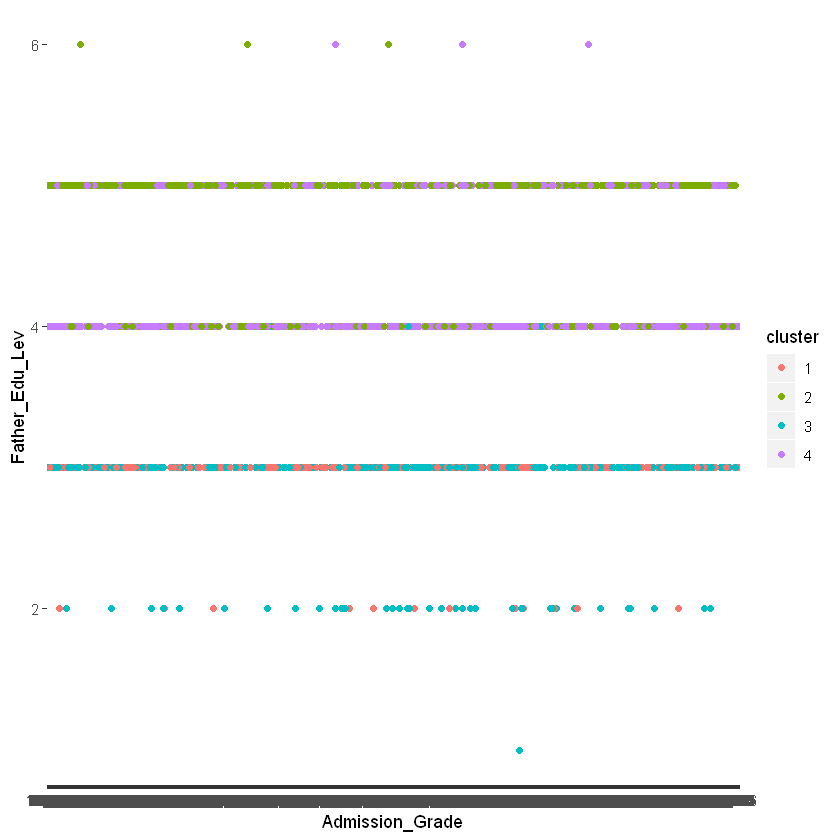

In [105]:
ggplot() +
    geom_point(data = clustering_df,
              mapping = aes(x = Admission_Grade, y = Father_Edu_Lev,
               colour = cluster))

In [158]:
clustering_df_2 <- select(enrolments_df_clean, Stud_ID, Admission_Grade, CRE_RECON_INI, Degree_ID, Sex, Start_Year )
head(clustering_df_2)

,Stud_ID,Admission_Grade,CRE_RECON_INI,Degree_ID,Sex,Start_Year
4,460803,"6,833",60,156,V,2010
7,460841,"6,1",30,156,M,2010
9,460463,"9,618",60,158,V,2010
11,461003,"10,02",60,156,M,2010
14,331928,"10,25",60,156,V,2010
15,460393,"10,056",60,158,M,2010


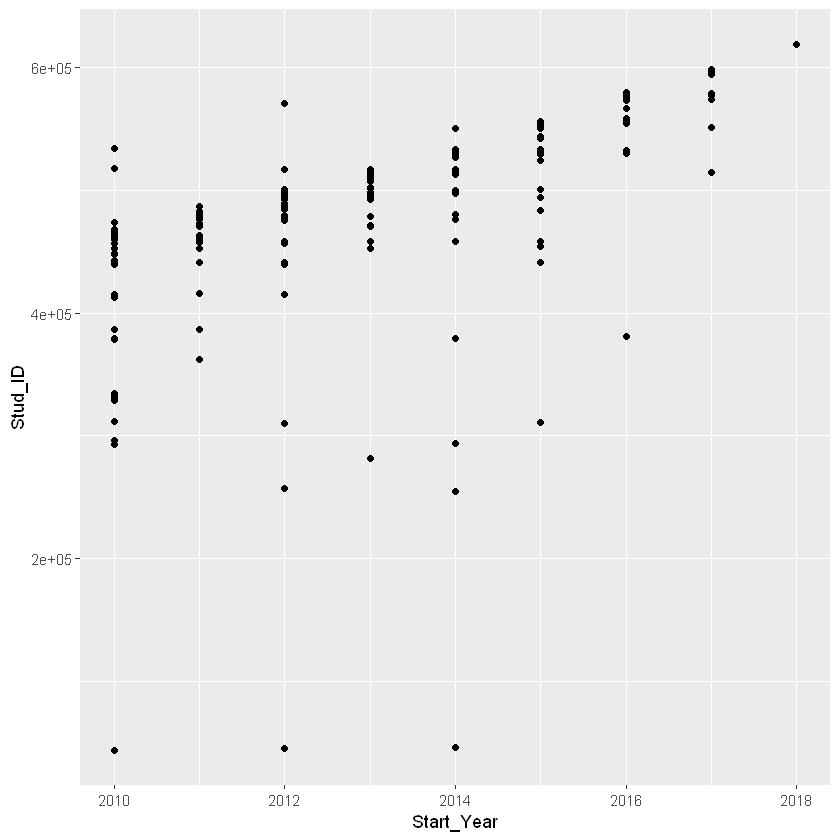

In [160]:
ggplot() +
    geom_point(data = clustering_df_2,
              mapping = aes(x = Start_Year, y = Stud_ID ))

In [151]:
str(clustering_df_2)

'data.frame':	2047 obs. of  3 variables:
 $ Stud_ID        : int  460803 460841 460463 461003 331928 460393 460362 460281 460998 460838 ...
 $ Admission_Grade: Factor w/ 4029 levels "","10","10,001",..: 2249 1981 3760 17 181 48 3822 223 2322 3644 ...
 $ CRE_RECON_INI  : Factor w/ 210 levels "","0","0,33",..: 157 116 157 157 157 157 157 157 138 157 ...
 - attr(*, "na.action")= 'omit' Named int  1 2 3 5 6 8 10 12 13 17 ...
  ..- attr(*, "names")= chr  "1" "2" "3" "5" ...
